In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid",{"axes.facebolor":"0.90"})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":2.5})

import pylab
pylab.rcParams['figure.figsize'] = (20, 20)
plt.style.use('fivethirtyeight')

test='https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'

df = pd.read_csv(test,index_col='date', parse_dates=True)
usa=df[df['location'] == 'United States']
usa_rolling7=usa['total_cases'].diff(1).fillna(0).rolling(7).mean()
usa_rolling7

# datetime processing
import datetime as datetime
from datetime import datetime as dt
today=dt.today()

today = datetime.date(month=today.month, day=today.day, year=today.year)
yesterday=today-datetime.timedelta(days=1)

print('TODAY: ',today)

print('YESTERDAY: ',yesterday, yesterday.strftime("%A"))


TODAY:  2021-06-02
YESTERDAY:  2021-06-01 Tuesday


# <font color=#cf0234> Total COVID-19 Cases in United States as of Today </font>
   

In [8]:

print(f"USA TOTAL CASE COUNT: {usa['total_cases'].diff(1).fillna(0).sum():,} as of "+today.strftime("%A")+' '+str(today))

USA TOTAL CASE COUNT: 33,287,437.0 as of Wednesday 2021-06-02


# <font color=#cf0234> Yesterday's New Cases </font>
   

In [9]:
usa_daily=usa['total_cases'].diff(1).fillna(0)
yesterday=usa_daily[-1]
print(f"Yesterday's New Cases {today}: ",f"{yesterday:,}")

Yesterday's New Cases 2021-06-02:  23,010.0


In [10]:
usa_daily.tail(15)

date
2021-05-18    27819.0
2021-05-19    29293.0
2021-05-20    30141.0
2021-05-21    28341.0
2021-05-22    19778.0
2021-05-23    12853.0
2021-05-24    25925.0
2021-05-25    22756.0
2021-05-26    24052.0
2021-05-27    27525.0
2021-05-28    21968.0
2021-05-29    11976.0
2021-05-30     6725.0
2021-05-31     5764.0
2021-06-01    23010.0
Name: total_cases, dtype: float64

Text(0.5, 0, 'Date')

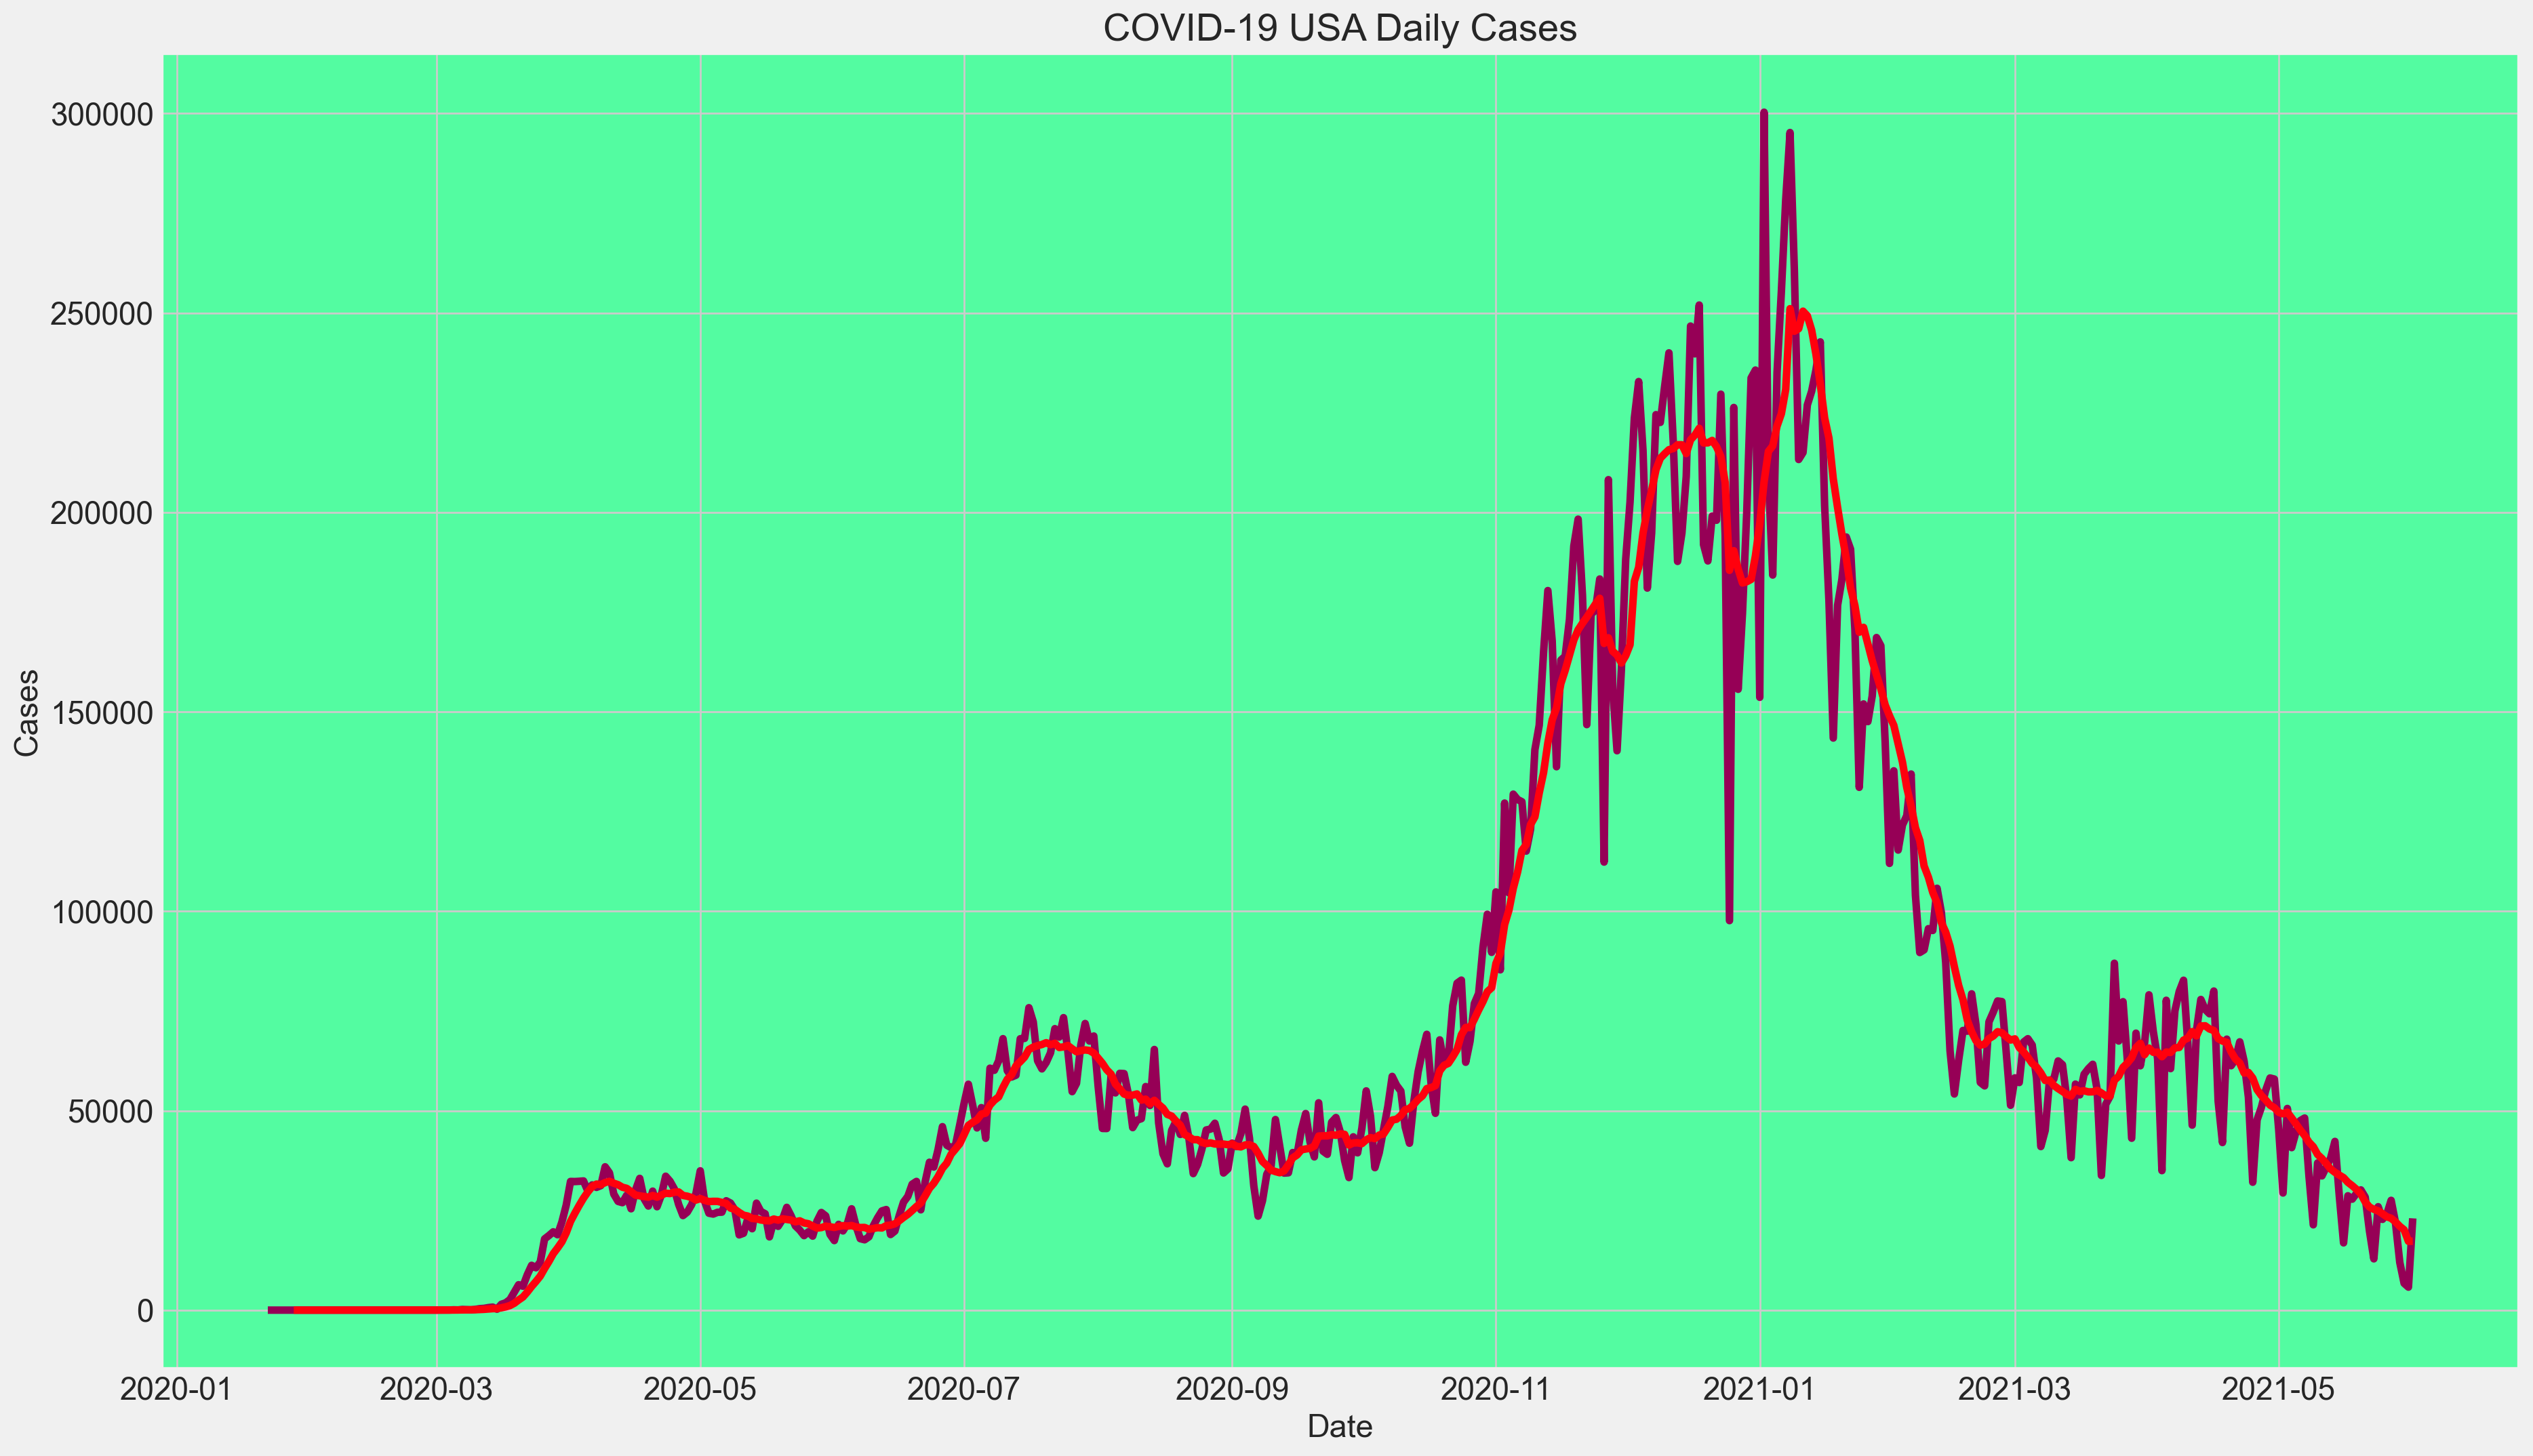

In [11]:
fig = plt.figure(figsize=(20,12),dpi=200)
x1=usa['total_cases'].diff(1).fillna(0)
ax=sns.lineplot(data=x1,x=x1.index,y=x1,color='#960056')
ax=sns.lineplot(data=usa_rolling7, x=usa_rolling7.index,y=usa_rolling7,color='#ff000d')
ax.set_title('COVID-19 USA Daily Cases')
ax.set_facecolor('xkcd:sea green')
ax.set_ylabel("Cases")
ax.set_xlabel("Date")
# fig.savefig('covidd_april7-2021.png',dpi=165, bbox_inches='tight')

Text(0.5, 0, 'Date')

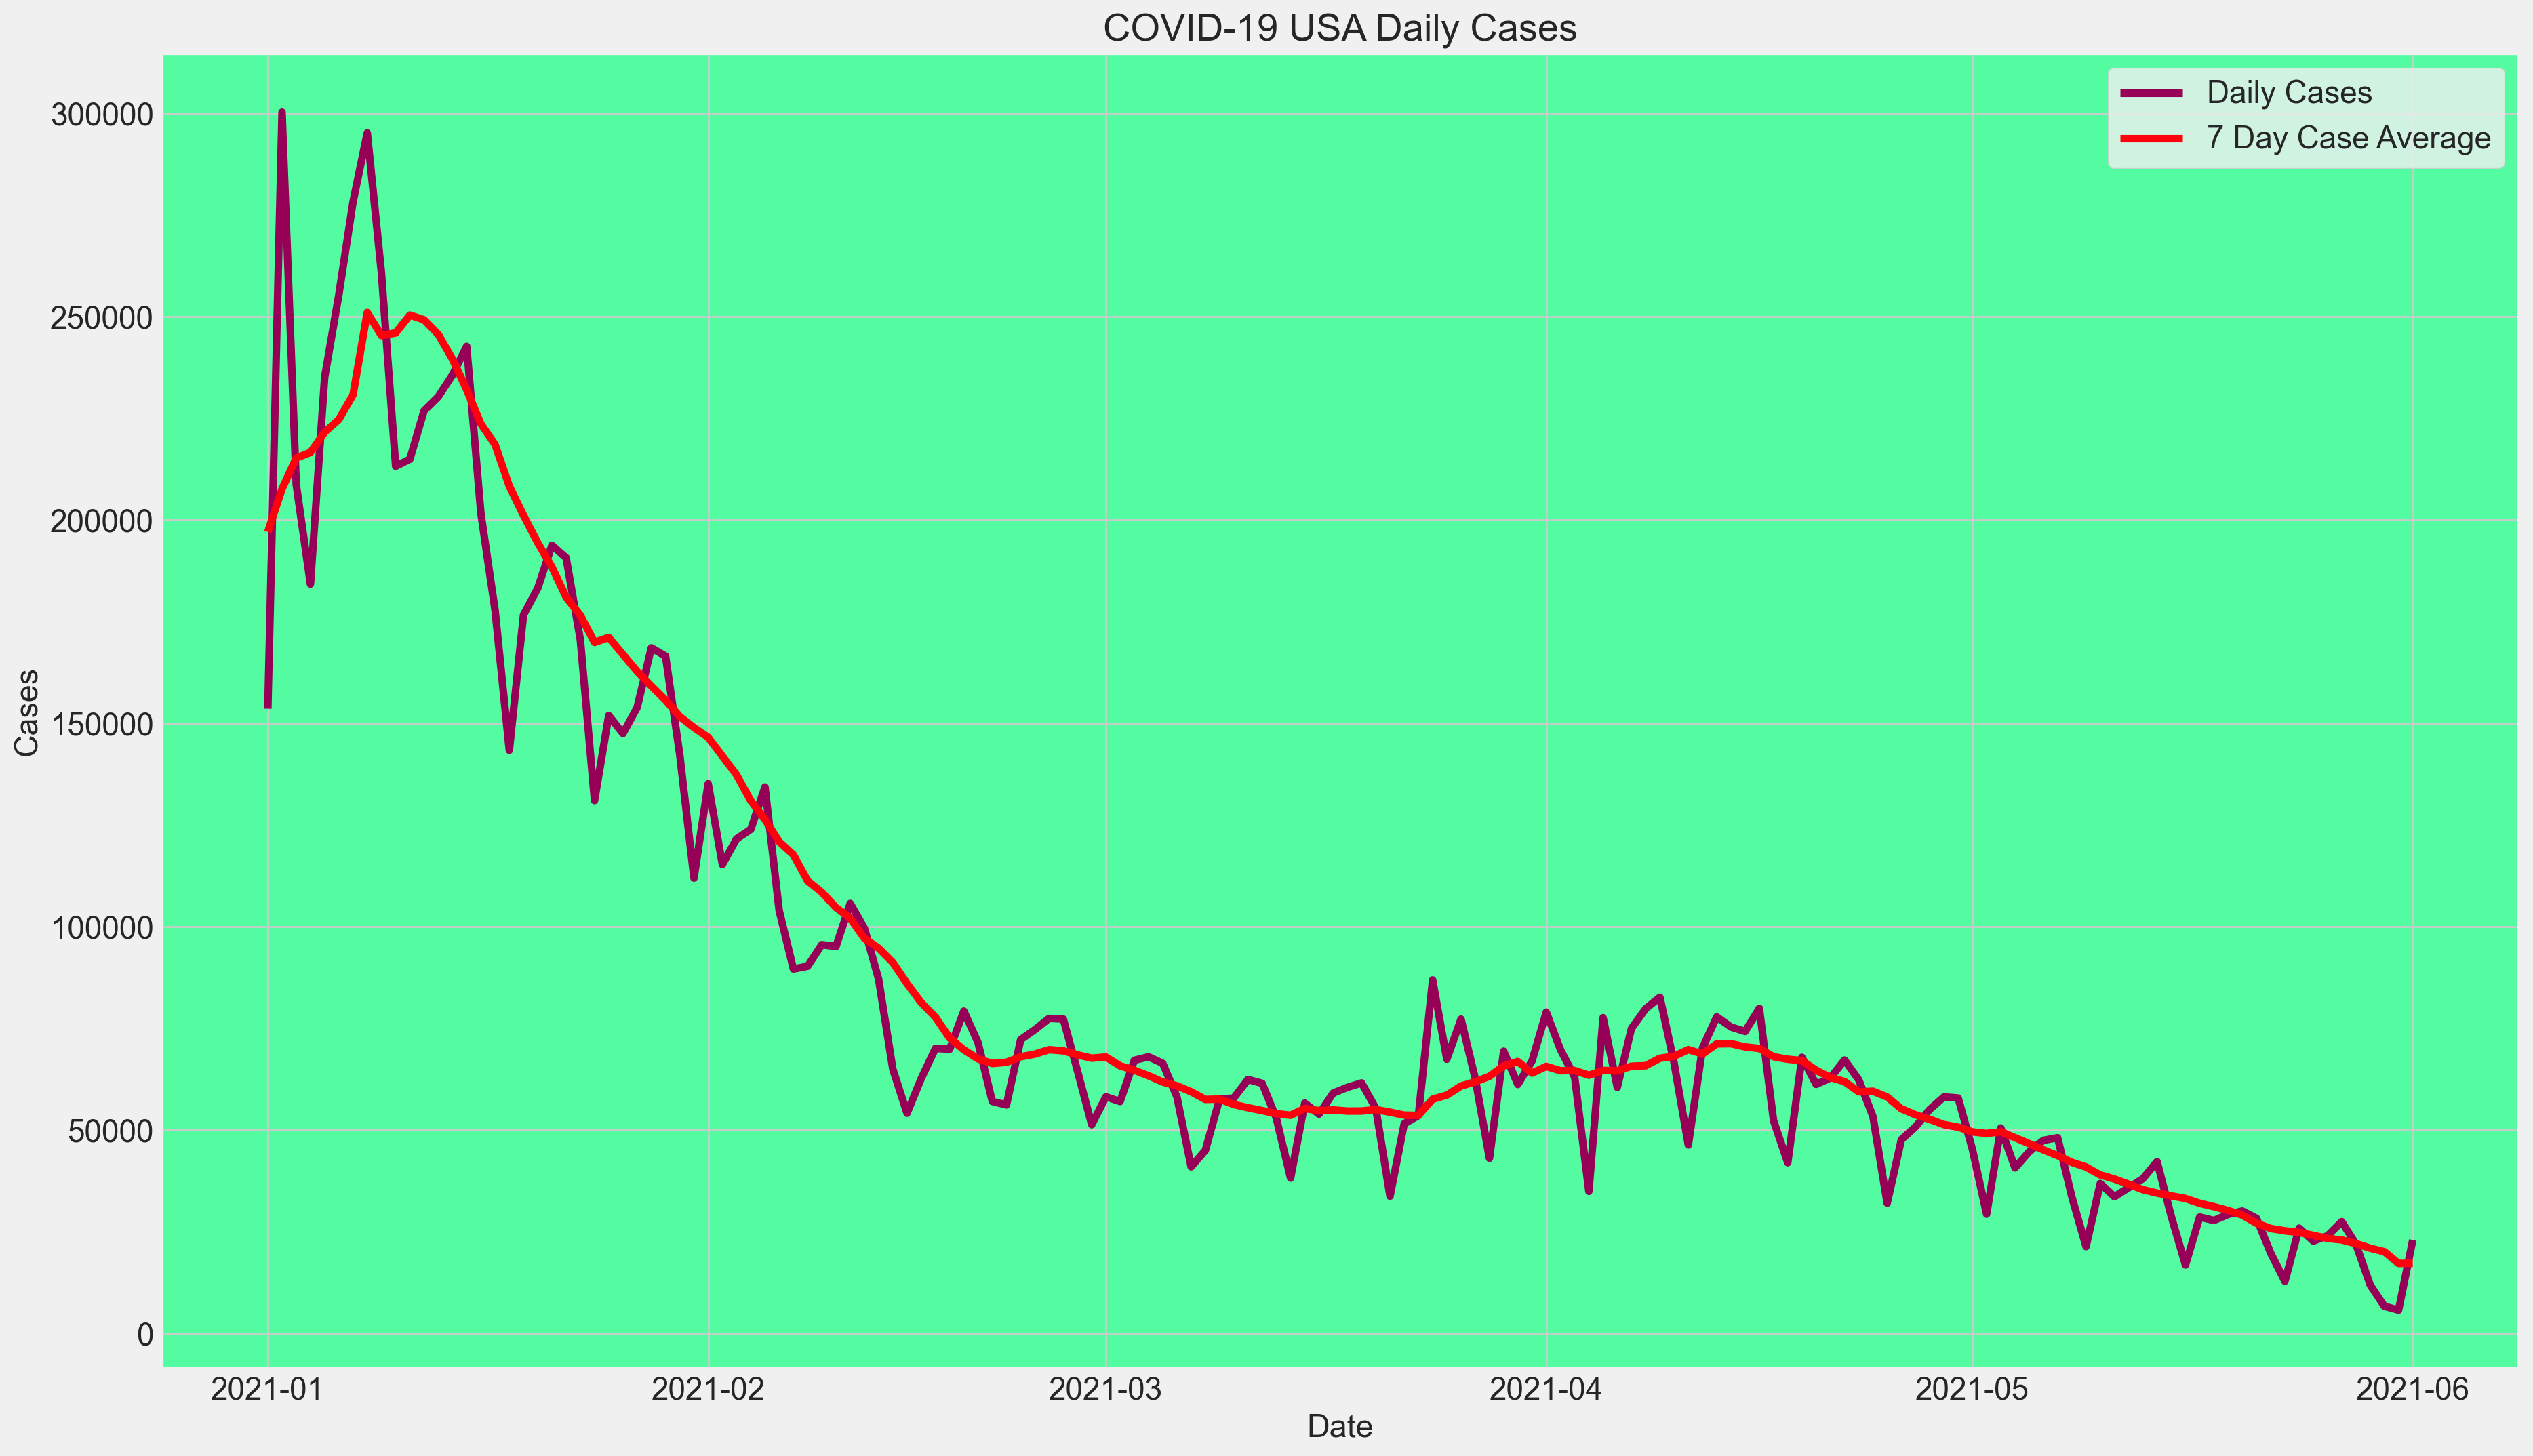

In [12]:
usa_rolling7=usa_rolling7.loc['2021':]
fig = plt.figure(figsize=(20,12),dpi=200)
x1=usa_daily.loc['2021':]
ax=sns.lineplot(data=x1,x=x1.index,y=x1,color='#960056',label='Daily Cases')
ax=sns.lineplot(data=usa_rolling7, x=usa_rolling7.index,y=usa_rolling7,color='#ff000d',label='7 Day Case Average')
ax.set_title('COVID-19 USA Daily Cases')
ax.set_facecolor('xkcd:sea green')
ax.set_ylabel("Cases")
ax.set_xlabel("Date")
# fig.savefig('America_covidd_april7-2021.png',dpi=300, bbox_inches='tight')